In [1]:
#import the packages needed for this project
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#read in data and view first 5 lines to get a feel for what I'm working with
df = pd.read_csv("/Users/brycebangerter/Documents/all/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#look at the dimensions of the dataframe to see how many variables and observations we have
df.shape

(1460, 81)

In [4]:
#view all the varibles in our dataset
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# had help from Conner's code to show only the variables with missing values 
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing
df[show_missing()].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [6]:
#replace NaN values with the mean of the existing values
df['LotFrontage_copy'] = df['LotFrontage']
df.LotFrontage_copy = df.LotFrontage_copy.isna()
df.LotFrontage_copy
LotFrontageMean = df.LotFrontage.mean()
def NaN(row):
    if (row["LotFrontage_copy"]) == True:
        return LotFrontageMean
    else:
        return (row['LotFrontage'])
df['LotFrontage_copy'] = df.apply(NaN, axis=1)
df.LotFrontage_copy
df.drop('LotFrontage', axis=1, inplace=True)
df.rename(columns={'LotFrontage_copy': 'LotFrontage'}, inplace=True)

In [7]:
#the next set of variables I fix NaN values for are categorical and, after reading their descriptions in the .txt file, I determined that NaN corresponded to the observation not having that particular type of quality, so I returned "None"
df['Alley_copy'] = df['Alley']
df.Alley_copy = df.Alley.isna()
def NaNalley(row):
    if (row["Alley_copy"]) == True:
        return 'None'
    else:
        return (row['Alley'])
df['Alley_copy'] = df.apply(NaNalley, axis=1)
df.drop('Alley', axis=1, inplace=True)
df.rename(columns={'Alley_copy': 'Alley'}, inplace=True)

In [8]:
df['MasVnrType_copy'] = df['MasVnrType']
df.MasVnrType_copy = df.MasVnrType.isna()
def NaNmasvnrtype(row):
    if (row["MasVnrType_copy"]) == True:
        return 'None'
    else:
        return (row['MasVnrType'])
df['MasVnrType_copy'] = df.apply(NaNmasvnrtype, axis=1)
df.drop('MasVnrType', axis=1, inplace=True)
df.rename(columns={'MasVnrType_copy': 'MasVnrType'}, inplace=True)

In [9]:
df['MasVnrArea'].mode()

0    0.0
dtype: float64

In [10]:
#this variable is an integer but because there are the same number of missing values for this as the MasVnrType variable, it's safe to assume that the missing values should be "0" because the MasVnrType is "None"
df['MasVnrArea_copy'] = df['MasVnrArea']
df.MasVnrArea_copy = df.MasVnrArea.isna()
def NaNmasvnrarea(row):
    if (row["MasVnrArea_copy"]) == True:
        return "0"
    else:
        return (row['MasVnrArea'])
df['MasVnrArea_copy'] = df.apply(NaNmasvnrarea, axis=1)
df.drop('MasVnrArea', axis=1, inplace=True)
df.rename(columns={'MasVnrArea_copy': 'MasVnrArea'}, inplace=True)

In [11]:
df['BsmtQual_copy'] = df['BsmtQual']
df.BsmtQual_copy = df.BsmtQual.isna()
def NaNBsmtQual(row):
    if (row["BsmtQual_copy"]) == True:
        return 'None'
    else:
        return (row['BsmtQual'])
df['BsmtQual_copy'] = df.apply(NaNBsmtQual, axis=1)
df.drop('BsmtQual', axis=1, inplace=True)
df.rename(columns={'BsmtQual_copy': 'BsmtQual'}, inplace=True)

In [12]:
df['BsmtCond_copy'] = df['BsmtCond']
df.BsmtCond_copy = df.BsmtCond.isna()
def NaNBsmtCond(row):
    if (row["BsmtCond_copy"]) == True:
        return 'None'
    else:
        return (row['BsmtCond'])
df['BsmtCond_copy'] = df.apply(NaNBsmtCond, axis=1)
df.drop('BsmtCond', axis=1, inplace=True)
df.rename(columns={'BsmtCond_copy': 'BsmtCond'}, inplace=True)

In [13]:
df['BsmtExposure_copy'] = df['BsmtExposure']
df.BsmtExposure_copy = df.BsmtExposure.isna()
def NaNBsmtExposure(row):
    if (row["BsmtExposure_copy"]) == True:
        return 'None'
    else:
        return (row['BsmtExposure'])
df['BsmtExposure_copy'] = df.apply(NaNBsmtExposure, axis=1)
df.drop('BsmtExposure', axis=1, inplace=True)
df.rename(columns={'BsmtExposure_copy': 'BsmtExposure'}, inplace=True)

In [14]:
df['BsmtFinType1_copy'] = df['BsmtFinType1']
df.BsmtFinType1_copy = df.BsmtFinType1.isna()
def NaNBsmtFinType1(row):
    if (row["BsmtFinType1_copy"]) == True:
        return 'None'
    else:
        return (row['BsmtFinType1'])
df['BsmtFinType1_copy'] = df.apply(NaNBsmtFinType1, axis=1)
df.drop('BsmtFinType1', axis=1, inplace=True)
df.rename(columns={'BsmtFinType1_copy': 'BsmtFinType1'}, inplace=True)

In [15]:
df['BsmtFinType2_copy'] = df['BsmtFinType2']
df.BsmtFinType2_copy = df.BsmtFinType2.isna()
def NaNBsmtFinType2(row):
    if (row["BsmtFinType2_copy"]) == True:
        return 'None'
    else:
        return (row['BsmtFinType2'])
df['BsmtFinType2_copy'] = df.apply(NaNBsmtFinType2, axis=1)
df.drop('BsmtFinType2', axis=1, inplace=True)
df.rename(columns={'BsmtFinType2_copy': 'BsmtFinType2'}, inplace=True)

In [16]:
#this one differs slightly because there shouldn't be any "None" values for this particular variable, so I just replaced the missing value with the mode of the variable, in this case, SBrkr
df['Electrical_copy'] = df['Electrical']
df.Electrical_copy = df.Electrical.isna()
def NaNElectrical(row):
    if (row["Electrical_copy"]) == True:
        return 'SBrkr'
    else:
        return (row['Electrical'])
df['Electrical_copy'] = df.apply(NaNElectrical, axis=1)
df.drop('Electrical', axis=1, inplace=True)
df.rename(columns={'Electrical_copy': 'Electrical'}, inplace=True)

In [17]:
df['FireplaceQu_copy'] = df['FireplaceQu']
df.FireplaceQu_copy = df.FireplaceQu.isna()
def NaNFireplaceQu(row):
    if (row["FireplaceQu_copy"]) == True:
        return 'None'
    else:
        return (row['FireplaceQu'])
df['FireplaceQu_copy'] = df.apply(NaNFireplaceQu, axis=1)
df.drop('FireplaceQu', axis=1, inplace=True)
df.rename(columns={'FireplaceQu_copy': 'FireplaceQu'}, inplace=True)

In [18]:
df['GarageType_copy'] = df['GarageType']
df.GarageType_copy = df.GarageType.isna()
def NaNGarageType(row):
    if (row["GarageType_copy"]) == True:
        return 'None'
    else:
        return (row['GarageType'])
df['GarageType_copy'] = df.apply(NaNGarageType, axis=1)
df.drop('GarageType', axis=1, inplace=True)
df.rename(columns={'GarageType_copy': 'GarageType'}, inplace=True)

In [19]:
#this next variable, since it was not categorical, required me to do something different. In this case, I wanted to see how correlated the year the house was built is with the year the garage was built
df['GarageYrBlt'].corr(df['YearBuilt'])

0.8256674841743423

In [20]:
#after determining that the corr coef is pretty high, I decided to just replace missing values for when the garage was built with the year the house was built
df['GarageYrBlt_copy'] = df['GarageYrBlt']
df.GarageYrBlt_copy = df.GarageYrBlt.isna()
def NaNGarageYrBlt(row):
    if (row["GarageYrBlt_copy"]) == True:
        return (row['YearBuilt'])
    else:
        return (row['GarageYrBlt'])
df['GarageYrBlt_copy'] = df.apply(NaNGarageYrBlt, axis=1)
df.drop('GarageYrBlt', axis=1, inplace=True)
df.rename(columns={'GarageYrBlt_copy': 'GarageYrBlt'}, inplace=True)

In [21]:
df['GarageFinish_copy'] = df['GarageFinish']
df.GarageFinish_copy = df.GarageFinish.isna()
def NaNGarageFinish(row):
    if (row["GarageFinish_copy"]) == True:
        return 'None'
    else:
        return (row['GarageFinish'])
df['GarageFinish_copy'] = df.apply(NaNGarageFinish, axis=1)
df.drop('GarageFinish', axis=1, inplace=True)
df.rename(columns={'GarageFinish_copy': 'GarageFinish'}, inplace=True)

In [22]:
df['GarageQual_copy'] = df['GarageQual']
df.GarageQual_copy = df.GarageQual.isna()
def NaNGarageQual(row):
    if (row["GarageQual_copy"]) == True:
        return 'None'
    else:
        return (row['GarageQual'])
df['GarageQual_copy'] = df.apply(NaNGarageQual, axis=1)
df.drop('GarageQual', axis=1, inplace=True)
df.rename(columns={'GarageQual_copy': 'GarageQual'}, inplace=True)

In [23]:
df['GarageCond_copy'] = df['GarageCond']
df.GarageCond_copy = df.GarageCond.isna()
def NaNGarageCond(row):
    if (row["GarageCond_copy"]) == True:
        return 'None'
    else:
        return (row['GarageCond'])
df['GarageCond_copy'] = df.apply(NaNGarageCond, axis=1)
df.drop('GarageCond', axis=1, inplace=True)
df.rename(columns={'GarageCond_copy': 'GarageCond'}, inplace=True)

In [24]:
#dropped this variable since there are so few data points because there are so few houses with pools
df.drop('PoolQC', axis=1, inplace=True)

In [25]:
df['MiscFeature_copy'] = df['MiscFeature']
df.MiscFeature_copy = df.MiscFeature.isna()
def NaNMiscFeature(row):
    if (row["MiscFeature_copy"]) == True:
        return 'None'
    else:
        return (row['MiscFeature'])
df['MiscFeature_copy'] = df.apply(NaNMiscFeature, axis=1)
df.drop('MiscFeature', axis=1, inplace=True)
df.rename(columns={'MiscFeature_copy': 'MiscFeature'}, inplace=True)

In [26]:
df['Fence_copy'] = df['Fence']
df.Fence_copy = df.Fence.isna()
def NaNFence(row):
    if (row["Fence_copy"]) == True:
        return 'None'
    else:
        return (row['Fence'])
df['Fence_copy'] = df.apply(NaNFence, axis=1)
df.drop('Fence', axis=1, inplace=True)
df.rename(columns={'Fence_copy': 'Fence'}, inplace=True)

In [27]:
#want to see the dtypes of all variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
ExterQual        1460 non-

In [28]:
#changing the dtypes to be what I need them to be
df['MSSubClass'] = df['MSSubClass'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)
df['YrSold'] = df['YrSold'].astype(str)
df['LotFrontage'] = df['LotFrontage'].astype(int)
df['MasVnrArea'] = df['MasVnrArea'].astype(int)
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)

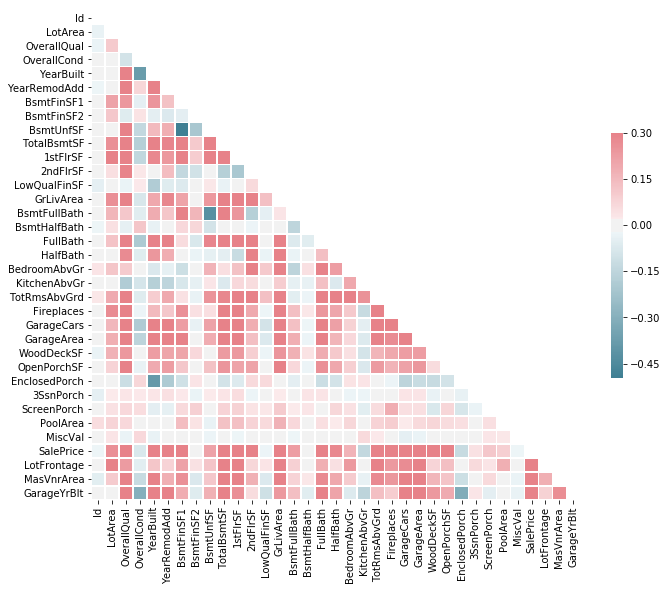

In [29]:
#code that I found to make a correlation coefficient heatmap from https://seaborn.pydata.org/examples/many_pairwise_correlations.html
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [30]:
#import scikitlearn packages for scaling the data
#I also extracted just the variables with dtype = int so I could perform the scaler function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfint = df.select_dtypes(exclude=['object'])

In [31]:
scaler.fit(dfint)
scaled_df = scaler.transform(dfint)

In [32]:
#the scaled_df is actually an array, so I needed to convert it into a dataframe with the correct column names
#This dataframe is now just all the scaled continuous variables
#I also dropped the 'Id' variable since that isn't a needed variable for the regression
contvar = pd.DataFrame(data=scaled_df, columns=dfint.columns)
contvar.drop('Id', axis=1, inplace=True)

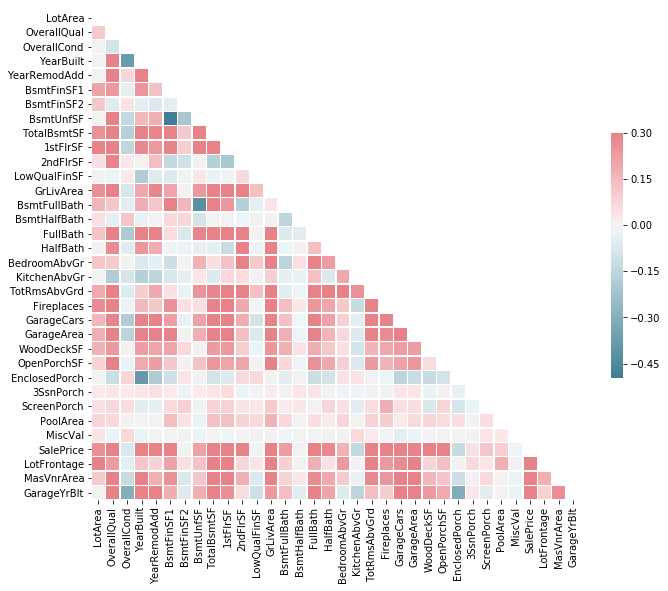

In [33]:
#code that I found to make a correlation coefficient heatmap from https://seaborn.pydata.org/examples/many_pairwise_correlations.html
corr = contvar.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [34]:
#change the categorical variables into dummy variables and got rid of dummies that represented a house having "None" for the value of that particular categorical variable
df = pd.get_dummies(df)
df = df[df.columns.drop(list(df.filter(regex='None')))]

In [35]:
#made a new dataframe that just included all the dummy variables
catvar = df.select_dtypes(exclude=['int'])

In [36]:
#made a new dataframe that combines the scaled continuous variables and the categorical variables into one dataframe
traindf = pd.concat([contvar, catvar], axis=1)

In [37]:
#Generate SalePrice vector and then drop it from the dataframe. This is done so I can use this SalePrice vector to regress on my explanatory variables
SalePrice = traindf.SalePrice
traindf.drop('SalePrice', axis=1, inplace=True)

In [38]:
#import scikitlearn packages for running regression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer

In [39]:
#here is where I run the regression. This code is pulled from Tyler's lecture
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)
linear_regression_model.fit(traindf, SalePrice)
predictions = linear_regression_model.predict(traindf)
mse = mean_squared_error(SalePrice, predictions)
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 0.3719710144513874


In [40]:
#here I am trying to split the data into train and test segments to find the optimal hyperparameters that minimize the MSE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(traindf, SalePrice, test_size=0.33, random_state=42)

In [41]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)
linear_regression_model.fit(X_train, y_train)
train_predictions = linear_regression_model.predict(X_train)
test_predictions = linear_regression_model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 0.14518012631102387
Test MSE: 0.2850263563409067


In [42]:
## source: http://scikit-learn.org/0.15/auto_examples/plot_learning_curve.html
## This is for plotting a learning curve that shows the MSE of the train and test subsets of the data to see if the model is high bias or high variance
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=make_scorer(mean_squared_error))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

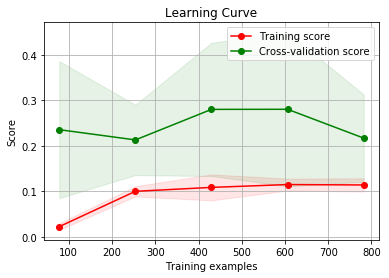

In [43]:
#Looking at the curves, we can see that there is a fairly large gap between the two curves, meaning that my model must be overfitting my data
plot_learning_curve(linear_regression_model, "Learning Curve", X_train, y_train, cv=5)

In [44]:
#I want to look at all the coefficients from my regression and want to keep coefficients that have a higher absolute value because they are more predictive of SalePrice
linear_regression_model.fit(X_train, y_train)
sorted(list(zip(traindf.columns, linear_regression_model.coef_)), key=lambda x: abs(x[1]))

[('Condition2_PosA', 0.0),
 ('Condition2_RRNn', 0.0),
 ('RoofMatl_Membran', 0.0),
 ('Exterior1st_ImStucc', 0.0),
 ('Electrical_Mix', 0.0),
 ('GarageType_Basment', -5.301102663566017e-05),
 ('Condition2_RRAe', -0.00010856041753173731),
 ('MiscFeature_Gar2', -0.00010856041753173731),
 ('Exterior1st_AsphShn', -0.0001431122217224548),
 ('GarageCond_Po', -0.00016716141221181056),
 ('HouseStyle_1.5Fin', -0.0001759670271406019),
 ('Exterior1st_CBlock', -0.00019662015526077014),
 ('Exterior2nd_CBlock', -0.00019662015526077014),
 ('SaleType_ConLD', -0.00022506856211530052),
 ('MiscFeature_TenC', 0.00028565982462520786),
 ('Condition2_RRAn', 0.0002903125286915377),
 ('GarageQual_Po', -0.00033561487676119693),
 ('Electrical_FuseP', 0.0004169511266186043),
 ('BsmtFinType1_ALQ', -0.0004574819143382305),
 ('Neighborhood_Blueste', -0.000491325701582458),
 ('MiscFeature_Othr', -0.0005445694191414128),
 ('Exterior2nd_VinylSd', -0.0005689484291454335),
 ('Condition1_RRNe', 0.0005777141566250188),
 ('Roo

In [45]:
#only kept variables with relatively high coefficients
newtraindf = traindf[['OverallQual','BsmtCond_Fa', 'Functional_Maj1', 'Neighborhood_SawyerW', 'EnclosedPorch', 'BsmtFinType1_BLQ', 'Condition1_RRAn', 'GarageYrBlt', 'WoodDeckSF', 'ExterCond_Po', 'BldgType_TwnhsE', 'BsmtCond_Po', 'Utilities_AllPub', 'Neighborhood_Mitchel', 'Neighborhood_Sawyer', 'ExterCond_Ex', 'Functional_Min2', 'MSSubClass_160', 'Utilities_NoSeWa', 'BsmtFinType1_LwQ', 'Condition1_Feedr', 'HalfBath', 'LandSlope_Gtl', 'Exterior1st_ImStucc', 'HouseStyle_SFoyer', 'BsmtFinType2_ALQ', 'MSSubClass_50', 'BsmtFullBath', 'GarageCond_Po', 'YearBuilt', 'MasVnrArea', 'Neighborhood_MeadowV', 'FireplaceQu_TA', 'MoSold_1', 'BsmtCond_TA', 'LotShape_IR2', 'BsmtQual_Gd', 'MSSubClass_30', 'BsmtFinType2_LwQ', 'Neighborhood_Blueste', 'Heating_Floor', 'SaleCondition_Normal', 'TotRmsAbvGrd', 'BedroomAbvGr', 'Functional_Min1', 'Condition1_RRAe', 'MasVnrType_BrkFace', 'GarageArea', 'SaleCondition_AdjLand', 'Neighborhood_NAmes', 'RoofMatl_Roll', 'Neighborhood_NridgHt', 'Neighborhood_BrDale', 'HouseStyle_1Story', 'YearRemodAdd', 'RoofStyle_Gable', 'PoolArea']]

In [46]:
#another train test split to find optimal hyperparameters
X_train, X_test, y_train, y_test = train_test_split(newtraindf, SalePrice, test_size=0.33, random_state=42)

In [47]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)
linear_regression_model.fit(X_train, y_train)
train_predictions = linear_regression_model.predict(X_train)
test_predictions = linear_regression_model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 0.19259917970645926
Test MSE: 0.2829460332655429


<module 'matplotlib.pyplot' from '/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

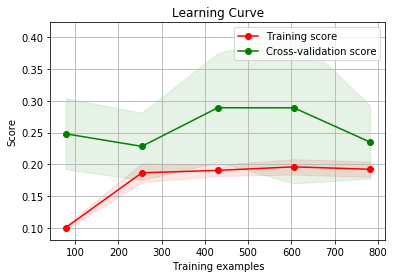

In [48]:
## source: http://scikit-learn.org/0.15/auto_examples/plot_learning_curve.html
##another plot of MSEs for both train and test
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=make_scorer(mean_squared_error))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(linear_regression_model, "Learning Curve", X_train, y_train, cv=5)

In [49]:
#This is the final model's MSEs for the train and test subsets of the data, which, if you refer to the plot above, are closer together than the last model, so there is less overfitting and better estimates relatively
from sklearn.linear_model import ElasticNetCV
clf = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=[.1, 1, 10])
clf.fit(X_train, y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)
print("Train MSE: {}".format(mean_squared_error(y_train, train_predictions)))
print("Test MSE: {}".format(mean_squared_error(y_test, test_predictions)))

Train MSE: 0.2389766296144455
Test MSE: 0.3196315910455206
